In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brands
from latex_conf import build_latex_confusion_matrix

import util

## Changes
+ Test first 8 instead of 2 predicted rois
+ siamese threshold is now 0.83 -> 0.9
+ changes in inference
  + remove low 1% images
  + pad images with 8

In [2]:
base_path_phish = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2"
base_path_benign = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign"

In [3]:
df_phish = pd.read_csv("result_v2_long2_opti2.txt", sep="\t")
df_phish["is_phish"] = 1
df_benign = pd.read_csv("result_v2_benign_opti2.txt", sep="\t")
df_benign["is_phish"] = 0

#df_phish = df_phish[df_phish['true_brand'].isin(brands.brands)]

df = df_phish.append(df_benign, ignore_index=True)

df_phish_old = df_phish
df_phish["phish_category"] = np.where(df_phish['true_brand'] == df_phish['pred_brand'], 1, 0)
df_rec = df_phish.append(df_benign, ignore_index=True)

/tmp/ipykernel_135874/1336378066.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_phish.append(df_benign, ignore_index=True)
/tmp/ipykernel_135874/1336378066.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rec = df_phish.append(df_benign, ignore_index=True)


In [4]:
print(f"Phishing sites: {df_phish.shape}")
print(f"Legit sites: {df_benign.shape}")
print(f"Dataframe sites: {df.shape}")

Phishing sites: (17456, 7)
Legit sites: (13465, 7)
Dataframe sites: (30921, 7)


In [5]:
confusion_matrix = pd.crosstab(df['is_phish'], df['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix_rec = pd.crosstab(df_rec['is_phish'], df_rec['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [6]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,10453,3012,13465
1,10277,7179,17456
All,20730,10191,30921


In [7]:
confusion_matrix_rec

Predicted,0,1,All
Actual,,,
0,10453,3012,13465
1,13333,4123,17456
All,23786,7135,30921


In [8]:
util.precision_sensitivity(confusion_matrix, confusion_matrix_rec)

Precision: 0.7044450986164262, Precision brand: 0.5778556412053258
Sensitivity: 0.41126260311640694, Sensitivity brand: 0.23619385884509625


# Error Details

## False Negatives

In [9]:
fn = df[(df['phish_category'] == 0) & (df['is_phish'] == 1)]
print(fn.shape)

(10277, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Facebook+437/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/eBay+11/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/PayPal+382/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Rackspace+69/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Apple+97/shot.png']

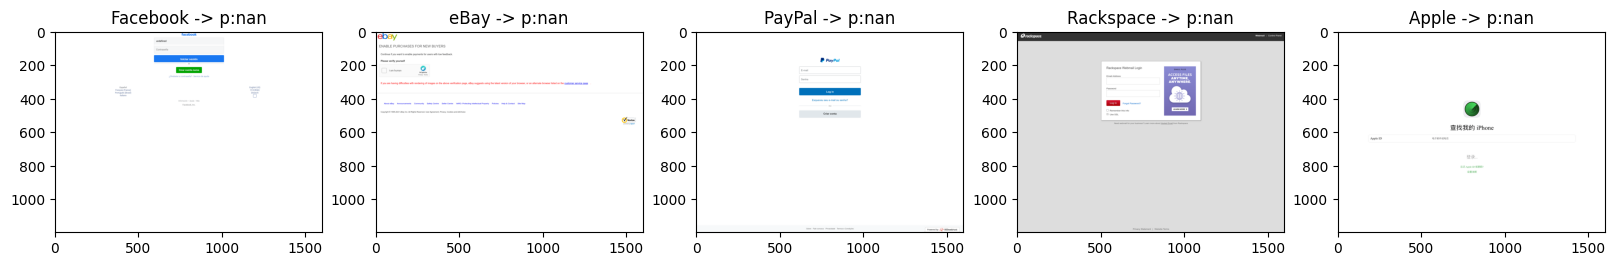

In [10]:
util.print_some_errors(fn, base_path_phish)

## False Positives

In [11]:
fp = df[(df['phish_category'] == 1) & (df['is_phish'] == 0)]
print(fp.shape)

(3012, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/quotev.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/r4---sn-aigl6nl7.googlevideo.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/r1---sn-hp57ynse.googlevideo.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/www.sigmalive.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/coinstats.app/shot.png']

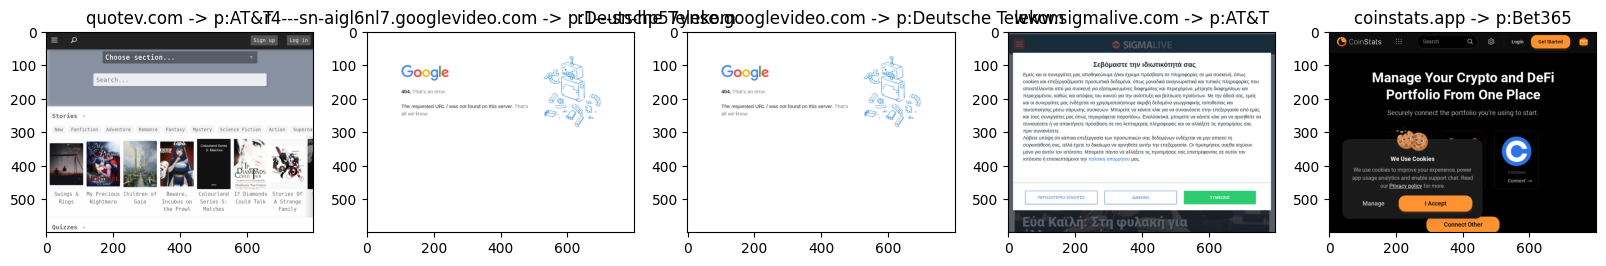

In [12]:
util.print_some_errors(fp, base_path_benign)

## True Positive - False Brand detection

In [13]:
brand_err = df_phish_old[(df_phish_old['true_brand'] != df_phish_old['pred_brand']) & df_phish_old['pred_brand']]
print(brand_err.shape)

(3056, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Credit Agricole+279/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/American Express+240/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/American Express+243/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/1&1 Ionos+326/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/PayPal+312/shot.png']

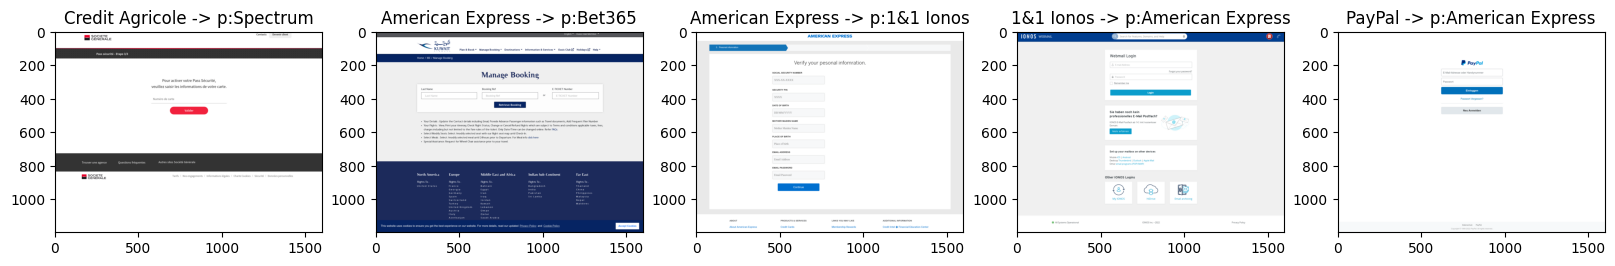

In [14]:
util.print_some_errors(brand_err, base_path_phish)

In [15]:
examples_fn = [
    "own_dataset_phish_long2/American Express+215/shot.png",
    "own_dataset_phish_long2/GoDaddy+142/shot.png",
    "own_dataset_phish_long2/Societe Generale+130/shot.png",
    "own_dataset_phish_long2/DocuSign+453/shot.png",
    "own_dataset_phish_long2/Deutsche Telekom+387/shot.png",
    "own_dataset_phish_long2/Standard Chartered Bank+293/shot.png",
    "own_dataset_phish_long2/Blockchain+353/shot.png",
    "own_dataset_phish_long2/American Express+120/shot.png"
]

examples_fp = [
    "own_dataset_benign/rr1---sn-i5heen7r.gvt1.com/shot.png",
    "own_dataset_benign/uncg.edu/shot.png",
    "own_dataset_benign/cognito-identity.ca-central-1.amazonaws.com/shot.png",
    "own_dataset_benign/rr1---sn-pmcg-bg0s.googlevideo.com/shot.png",
    "own_dataset_benign/delta206.rtb.appier.net/shot.png",
    "own_dataset_benign/ideal.bunq.com/shot.png",
    "own_dataset_benign/fm.tuba.pl/shot.png",
    "own_dataset_benign/www.metrotransit.org/shot.png"
]

examples_false_brand = [
    "own_dataset_phish_long2/Interac+56/shot.png",
    "own_dataset_phish_long2/PostFinance+312/shot.png",
    "own_dataset_phish_long2/WeTransfer+383/shot.png",
    "own_dataset_phish_long2/Standard Chartered Bank+180/shot.png",
    "own_dataset_phish_long2/PostFinance+395/shot.png",
    "own_dataset_phish_long2/Leboncoin+372/shot.png",
    "own_dataset_phish_long2/Blockchain+122/shot.png",
    "own_dataset_phish_long2/Google+25/shot.png"
]

# Statistic for Latex

In [16]:
print(build_latex_confusion_matrix(confusion_matrix))

\def \cTP {7179}
\def \cFP {3012}
\def \cTN {10453}
\def \cFN {10277}
\def \ctiP {17456}
\def \ctiN {13465}
\def \ctpP {10191}
\def \cFpN {20730}
\def \ctotal {30921}
\def \cPPV {70.4\%}
\def \cTPR {41.1\%}
\def \cACC {57.0\%}



In [17]:
print(build_latex_confusion_matrix(confusion_matrix_rec))

\def \cTP {4123}
\def \cFP {3012}
\def \cTN {10453}
\def \cFN {13333}
\def \ctiP {17456}
\def \ctiN {13465}
\def \ctpP {7135}
\def \cFpN {23786}
\def \ctotal {30921}
\def \cPPV {57.8\%}
\def \cTPR {23.6\%}
\def \cACC {47.1\%}

